In [1]:
!rm -rf Eunomia
!git clone https://github.com/ouaguenouni/Eunomia

Cloning into 'Eunomia'...
remote: Enumerating objects: 491, done.
remote: Counting objects: 100% (491/491), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 491 (delta 369), reused 424 (delta 302), pack-reused 0
Receiving objects: 100% (491/491), 3.21 MiB | 2.16 MiB/s, done.
Resolving deltas: 100% (369/369), done.


In [2]:
!pip install -r Eunomia/requirements.txt

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from Eunomia.preferences import *
from Eunomia.additive_functions import *
from Eunomia.alternatives import *
from Eunomia.sampling import *
from Eunomia.mcmc import *
from Eunomia.degree import *
from Eunomia.experiments import *
pyro.set_rng_seed(1)

In [4]:
alt_df = pd.read_csv("Eunomia/data/alternatives0.csv")
alternatives = alt_df.values
r_df = pd.read_csv("Eunomia/data/rank0.csv")
ranks = r_df.columns.values

In [5]:
n = alternatives.shape[0]
theta = generate_additive_theta(alternatives.shape[0],2)
preferences = PreferenceModel(alternatives, ranks)
data = preferences.generate_preference_matrix(theta)
data = torch.tensor(data).float()
data[0:2]

tensor([[ 0.,  0.,  0.,  0.,  1., -1., -1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [7]:
model = posterior_sampling_model(data, sigma_w = 1e-1, sigma_p = 10)
weights, sigmas = sample_model(model, data , "w", "sigma", warmup_steps = 10, num_samples = 50)

Sample: 100%|████████████████████████████████| 60/60 [00:01, 42.75it/s, step size=4.43e-02, acc. prob=0.149]


In [8]:
sv = compute_semivalues(n, theta, weights.numpy().mean(axis = 0), lambda x:1)

In [9]:
sv.argsort()

array([9, 6, 2, 7, 8, 3, 0, 4, 5, 1])

(array([ 8.,  1.,  0.,  3.,  0., 10., 13.,  0.,  6.,  9.]),
 array([0.84444445, 0.8577778 , 0.8711111 , 0.8844445 , 0.8977778 ,
        0.9111111 , 0.92444444, 0.93777776, 0.95111114, 0.96444446,
        0.9777778 ], dtype=float32),
 <BarContainer object of 10 artists>)

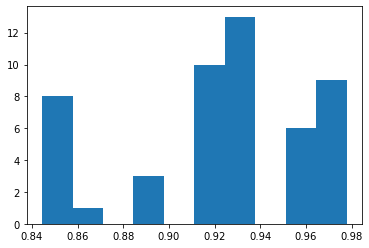

In [10]:
accs2 = get_acc_distribution(data, weights, sigmas)
plt.hist(accs2)